<a href="https://colab.research.google.com/github/SelimSavas/AccessToCleanWaterAndInfantMortality/blob/main/CityScapesCOCOMaskRCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CityScapes - Instance Segmentation - COCO Format

## 1. Setup

In [1]:
!git clone https://github.com/cemsaz/city-scapes-script.git # City Scapes Dataseti indirmek için indirme reposunu çekiyoruz.

Cloning into 'city-scapes-script'...
remote: Enumerating objects: 17, done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 17
Unpacking objects: 100% (17/17), 463.15 KiB | 10.29 MiB/s, done.


In [2]:
!git clone "https://github.com/TillBeemelmanns/cityscapes-to-coco-conversion" # City Scapes Datasetini Coco formatına çevirmek için gerekli dosya dizinini çekiyoruz.

Cloning into 'cityscapes-to-coco-conversion'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 28 (delta 5), reused 23 (delta 4), pack-reused 0
Unpacking objects: 100% (28/28), 5.58 MiB | 3.71 MiB/s, done.


In [3]:
# City Scapes Platformundan veri alabilmek için giriş yapıyoruz.
!wget --keep-session-cookies --save-cookies=cookies.txt --post-data 'username=SelimSavas&password=456789123aS.&submit=Login' https://www.cityscapes-dataset.com/login/

--2023-04-02 15:56:50--  https://www.cityscapes-dataset.com/login/
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.cityscapes-dataset.com/downloads/ [following]
--2023-04-02 15:56:52--  https://www.cityscapes-dataset.com/downloads/
Reusing existing connection to www.cityscapes-dataset.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [  <=>               ]  47.35K   119KB/s    in 0.4s    

2023-04-02 15:56:53 (119 KB/s) - ‘index.html’ saved [48483]



In [4]:
# gtFine_trainvaltest (1) datasetini indirmek için cookies.txt'ye başvuruyoruz.
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=1

--2023-04-02 15:56:53--  https://www.cityscapes-dataset.com/file-handling/?packageID=1
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252567705 (241M) [application/octet-stream]
Saving to: ‘gtFine_trainvaltest.zip’

gtFine_trainvaltest 100%[===================>] 240.87M  15.0MB/s    in 18s     

2023-04-02 15:57:11 (13.6 MB/s) - ‘gtFine_trainvaltest.zip’ saved [252567705/252567705]



  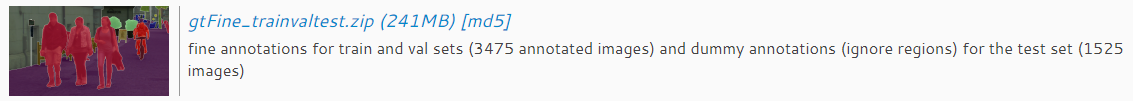

In [5]:
# leftImg8bit_trainvaltest (3) datasetini indirmek için cookies.txt'ye başvuruyoruz.
!wget --load-cookies cookies.txt --content-disposition https://www.cityscapes-dataset.com/file-handling/?packageID=3

--2023-04-02 15:57:11--  https://www.cityscapes-dataset.com/file-handling/?packageID=3
Resolving www.cityscapes-dataset.com (www.cityscapes-dataset.com)... 139.19.217.8
Connecting to www.cityscapes-dataset.com (www.cityscapes-dataset.com)|139.19.217.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11592327197 (11G) [application/octet-stream]
Saving to: ‘leftImg8bit_trainvaltest.zip’

leftImg8bit_trainva 100%[===================>]  10.80G  15.1MB/s    in 12m 59s 

2023-04-02 16:10:11 (14.2 MB/s) - ‘leftImg8bit_trainvaltest.zip’ saved [11592327197/11592327197]



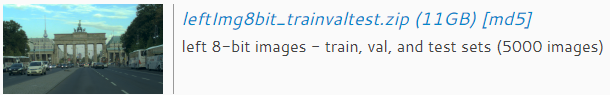

In [6]:
# gtFine_trainvaltest Datasetini zip'ten çıkarıyoruz.
!unzip gtFine_trainvaltest

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_000019_gt

In [7]:
# leftImg8bit_trainvaltest Datasetini zip'ten çıkarıyoruz.
!unzip leftImg8bit_trainvaltest

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 extracting: leftImg8bit/train/jena/jena_000074_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000040_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000020_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000030_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000005_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000059_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000100_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000034_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000089_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000104_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000107_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000080_000019_leftImg8bit.png  
 extracting: leftImg8bit/train/jena/jena_000006_000019_leftImg8bit.png  
 ext

In [8]:
# Cityscapes-to-coco-conversion Datasetimizin data klasörünü oluşturuyoruz.
%mkdir cityscapes-to-coco-conversion/data
%mkdir cityscapes-to-coco-conversion/data/cityscapes
%mkdir cityscapes-to-coco-conversion/data/cityscapes/annotations

In [9]:
# Komut yardımı ile Cityscapes-to-coco-conversion Datasetimizi kuruluma hazır hale getiriyoruz.
!cp -r /content/leftImg8bit /content/cityscapes-to-coco-conversion/data/cityscapes

In [10]:
# Komut yardımı ile Cityscapes-to-coco-conversion Datasetimizi kuruluma hazır hale getiriyoruz.
!cp -r /content/gtFine /content/cityscapes-to-coco-conversion/data/cityscapes

## 2. Installation

In [11]:
!pip install -r /content/cityscapes-to-coco-conversion/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3. Run

In [12]:
%cd /content/cityscapes-to-coco-conversion/
%ls

/content/cityscapes-to-coco-conversion
assets/  data/  inspect_coco.py  main.py  README.md  requirements.txt  utils/


In [13]:
!python main.py --dataset cityscapes --datadir data/cityscapes --outdir data/cityscapes/annotations

Starting leftImg8bit/train
Processed 0 images, 0 annotations
Processed 50 images, 559 annotations
Processed 100 images, 1220 annotations
Processed 150 images, 1819 annotations
Processed 200 images, 2559 annotations
Processed 250 images, 3312 annotations
Processed 300 images, 4059 annotations
Processed 350 images, 5105 annotations
Processed 400 images, 6775 annotations
Processed 450 images, 8285 annotations
Processed 500 images, 9809 annotations
Processed 550 images, 11453 annotations
Processed 600 images, 12820 annotations
Processed 650 images, 13411 annotations
Processed 700 images, 13993 annotations
Processed 750 images, 14565 annotations
Processed 800 images, 15201 annotations
Processed 850 images, 15971 annotations
Processed 900 images, 16964 annotations
Processed 950 images, 17992 annotations
Processed 1000 images, 18972 annotations
Processed 1050 images, 19560 annotations
Processed 1100 images, 20124 annotations
Processed 1150 images, 21006 annotations
Processed 1200 images, 2191

In [14]:
!python inspect_coco.py --coco_dir data/cityscapes 

data/cityscapes/annotations/instancesonly_filtered_gtFine_train.json
loading annotations into memory...
Done (t=5.16s)
creating index...
index created!
Image Count: 2965
Class Count: 9
  0. BG                                                
  1. person                                            
  2. car                                               
  3. rider                                             
  4. bicycle                                           
  5. truck                                             
  6. bus                                               
  7. motorcycle                                        
  8. train                                             
Figure(1400x500)
Figure(1400x500)
Figure(1400x500)
Figure(1400x500)
Figure(1400x500)
Figure(1600x800)
Figure(1600x800)
Figure(1600x800)
Figure(1600x800)
Figure(1600x800)


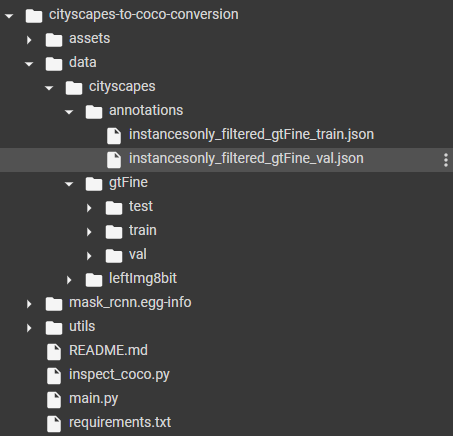

## Mask RCNN

In [16]:
%cd /content/

/content


In [17]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.1-cp39-cp39-linux_x86_64.whl size=44089 sha256=29d05ad7b1e9643aa7921de1f7ec98dd578dddc5a7da95ff07f938a1a10f1304
  Stored in directory: /root/.cache/pip/wheels/68/be/8f/b6c454cd264e0b349b47f8ee00755511f277618af9e5dae20d
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.8 requires PyYAML>=5.4.1, but you have pyyaml 5.1 which is incompatible.
dask 2022.12.1 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.

In [18]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  1.13 ; cuda:  cu116
detectron2: 0.6


In [19]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

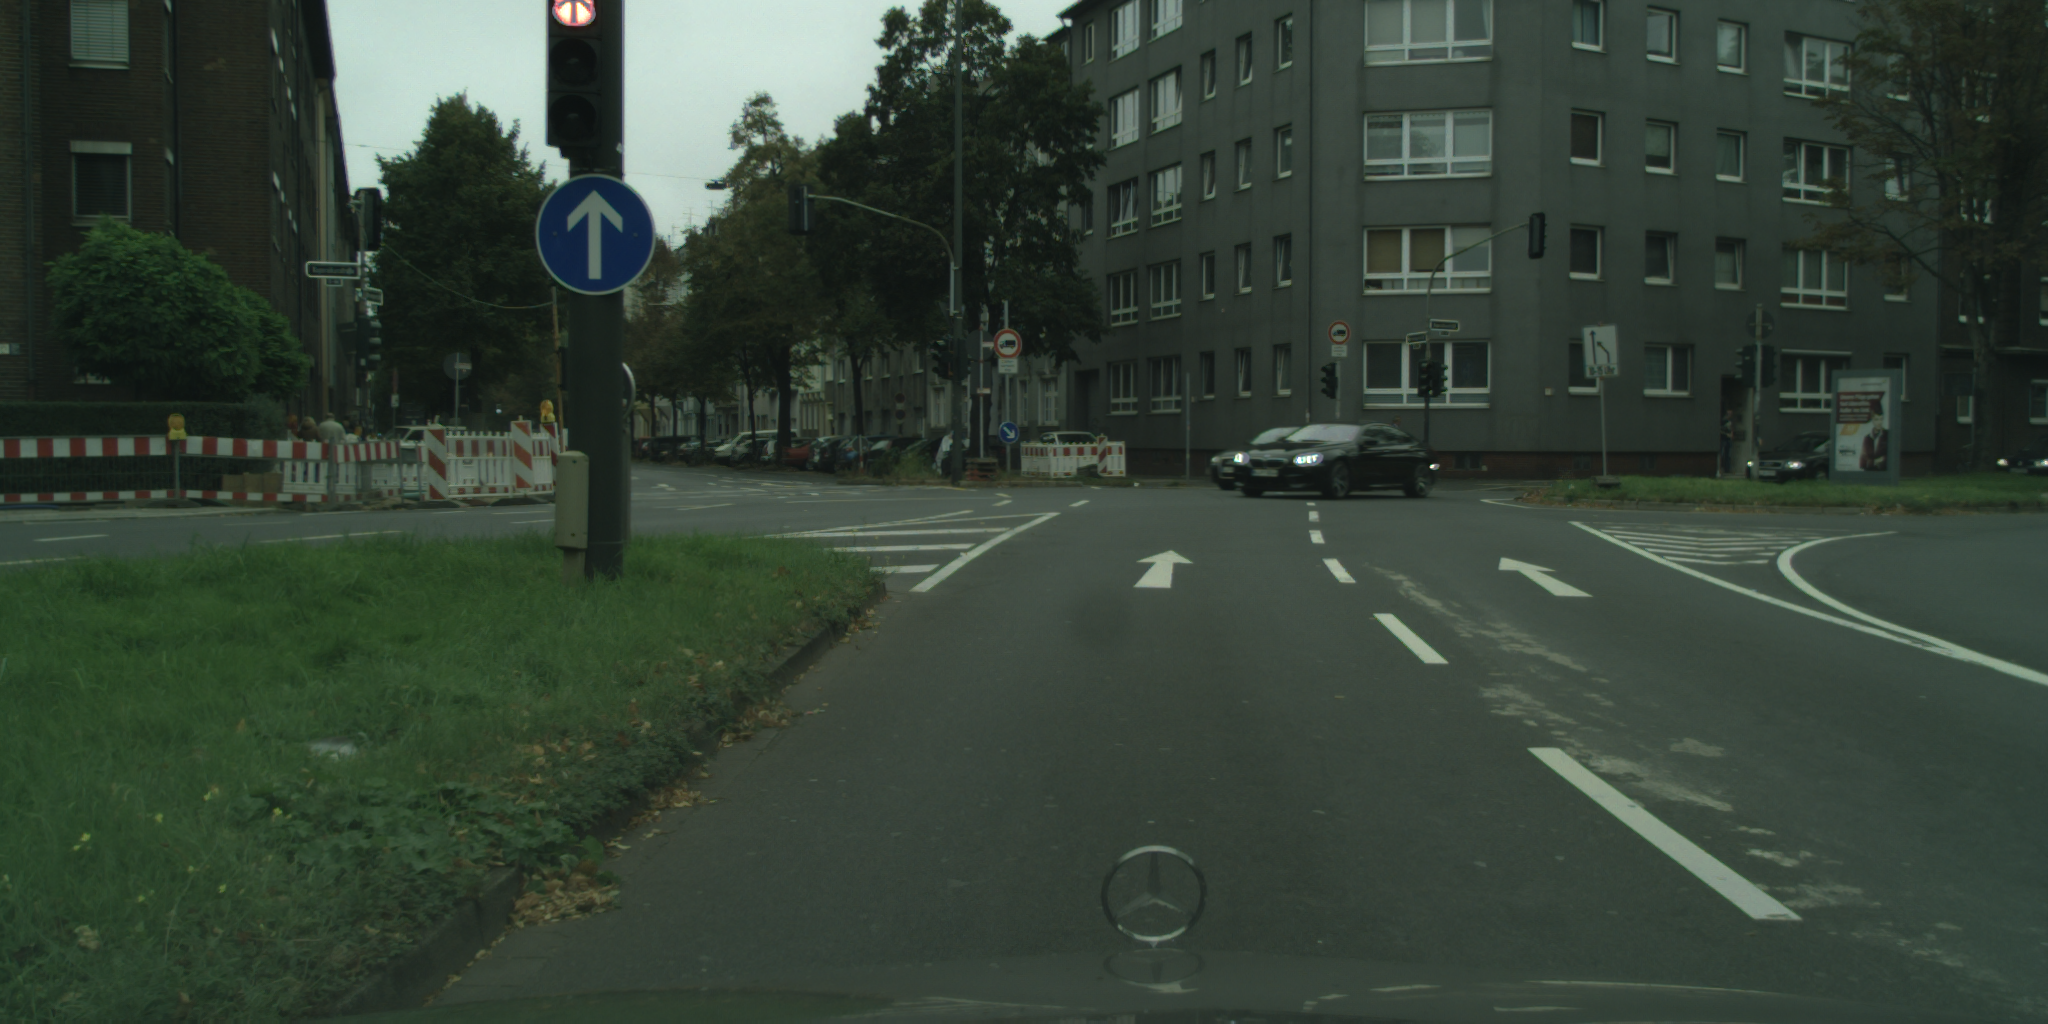

In [20]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("/content/leftImg8bit/train/dusseldorf/dusseldorf_000000_000019_leftImg8bit.png")
cv2_imshow(im)

In [21]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/02 16:27:42 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 191MB/s]                           
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [22]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([2, 9, 2, 2, 2, 2, 9, 2, 2], device='cuda:0')
Boxes(tensor([[1.2110e+03, 4.2020e+02, 1.4324e+03, 4.9956e+02],
        [5.4209e+02, 2.7902e-01, 6.2649e+02, 1.7741e+02],
        [1.7499e+03, 4.3234e+02, 1.8353e+03, 4.8198e+02],
        [7.1364e+02, 4.3155e+02, 7.7465e+02, 4.6377e+02],
        [8.0399e+02, 4.3630e+02, 8.4471e+02, 4.7084e+02],
        [8.1173e+02, 4.3667e+02, 8.9015e+02, 4.7182e+02],
        [7.8765e+02, 1.7969e+02, 8.1086e+02, 2.3440e+02],
        [1.0179e+03, 4.2886e+02, 1.1076e+03, 4.7606e+02],
        [7.2129e+02, 4.3087e+02, 8.1280e+02, 4.6644e+02]], device='cuda:0'))


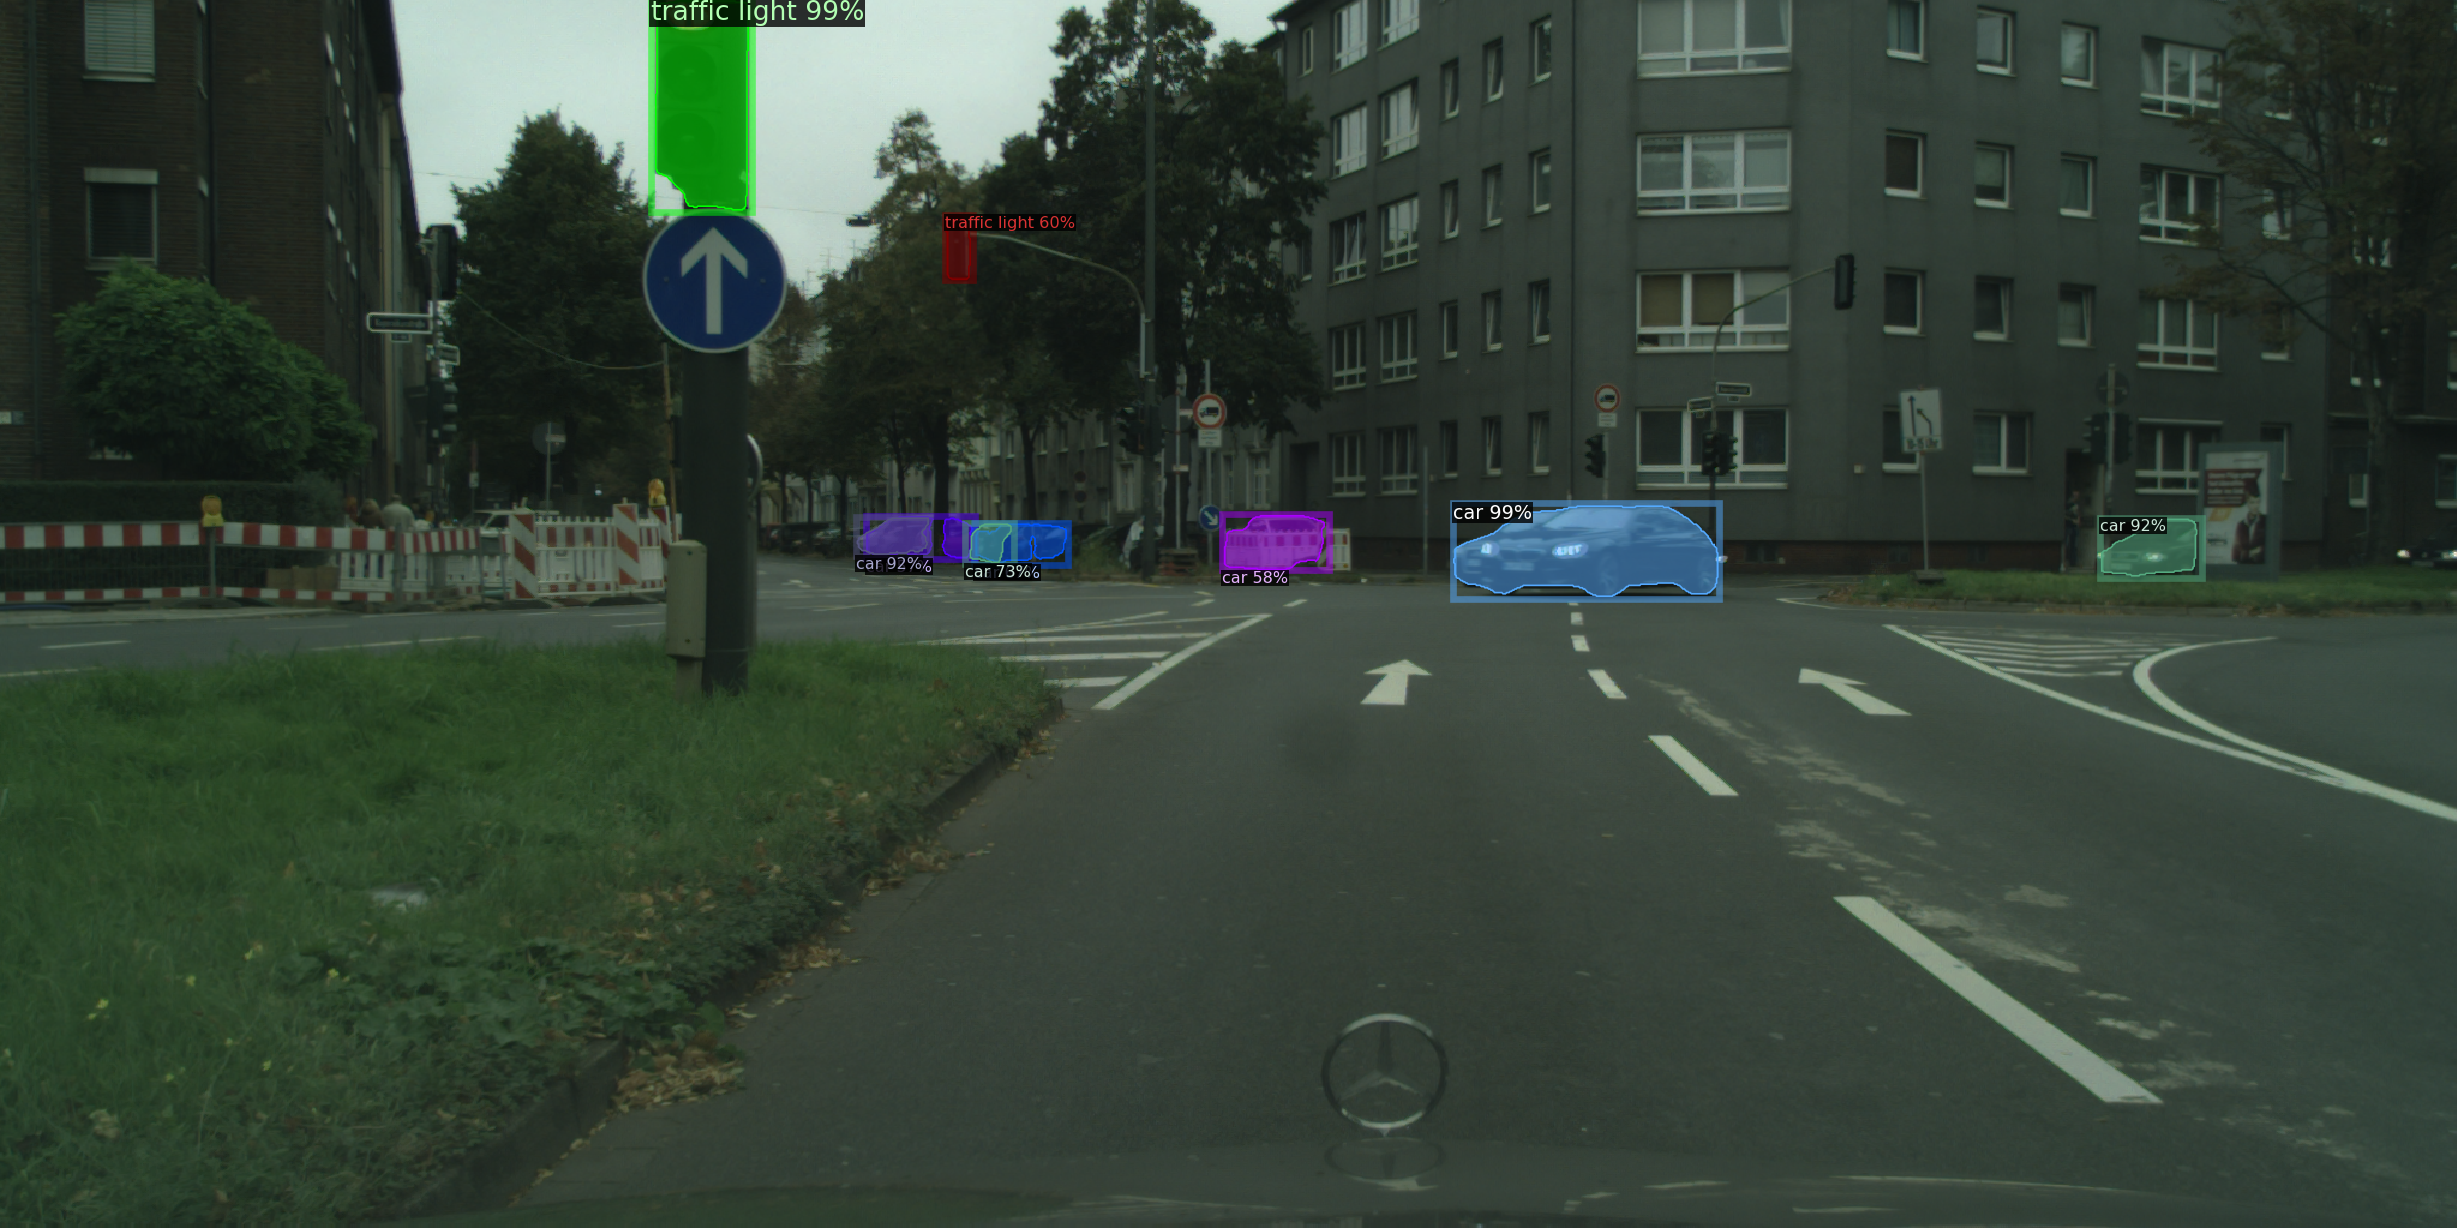

In [23]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])